In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import librosa
import os
from tqdm import tqdm

In [12]:
current_path = os.getcwd()
current_path

'C:\\Users\\angel\\git\\mml_project\\audio_analysis\\data_preparation'

In [76]:
os.chdir("C:/Users/angel/git/mml_project/audio_analysis")

In [78]:
current_path = os.getcwd()
current_path

'C:\\Users\\angel\\git\\mml_project\\audio_analysis'

In [80]:
df = pd.read_csv('C:/Users/angel/git/mml_project/audio_analysis/data/result_train.csv')

In [82]:
df.head()

,source,path,neutral,happy,sad,anger,surprise,disgust,fear
0,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-82....,0.0,0.666667,0.666667,0.0,0.0,0.0,0.666667
1,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-119...,1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
2,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-4.8...,0.0,0.666667,0.666667,0.0,0.0,0.0,0.333333
3,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-13....,1.0,0.333333,0.333333,0.0,0.0,0.0,0.000000
4,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-27....,1.0,0.666667,0.000000,0.0,0.0,0.0,0.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14681 entries, 0 to 14680
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   source    14681 non-null  object 
 1   path      14681 non-null  object 
 2   neutral   14681 non-null  float64
 3   happy     14681 non-null  float64
 4   sad       14681 non-null  float64
 5   anger     14681 non-null  float64
 6   surprise  14681 non-null  float64
 7   disgust   14681 non-null  float64
 8   fear      14681 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.0+ MB


In [86]:
df.isnull().sum()

source      0
path        0
neutral     0
happy       0
sad         0
anger       0
surprise    0
disgust     0
fear        0
dtype: int64

In [88]:
df['source'].value_counts()

source
MOSEI      13601
RAVDESS     1080
Name: count, dtype: int64

In [90]:
emotion_columns = ['neutral', 'happy', 'sad', 'anger', 'surprise', 'disgust', 'fear']
emotion_sums = df[emotion_columns].sum().sort_values(ascending=False)
print(emotion_sums)

neutral     6894.000000
happy       6778.333410
sad         2409.833389
anger       2318.333372
disgust     1868.833368
surprise     909.666684
fear         755.666682
dtype: float64


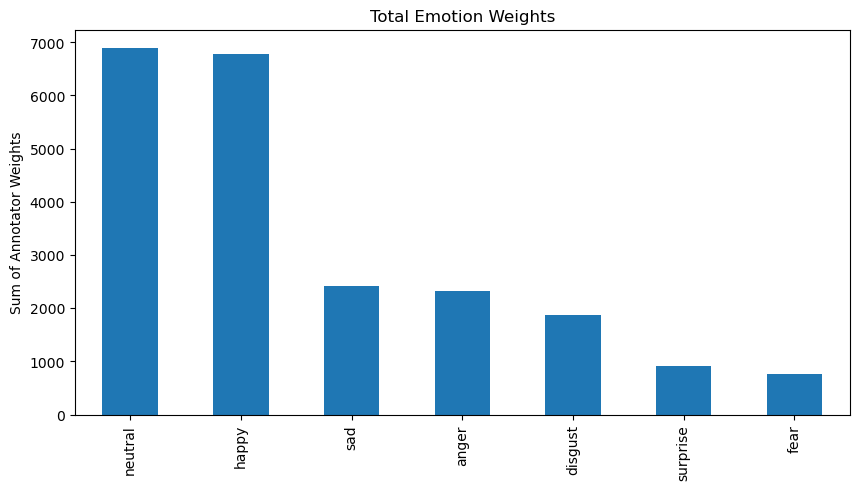

In [92]:
plt.figure(figsize=(10,5))
emotion_sums.plot(kind='bar')
plt.title("Total Emotion Weights")
plt.ylabel("Sum of Annotator Weights")
plt.show()

In [93]:
multi_emotion = df[df[emotion_columns].gt(0.5).sum(axis = 1) > 1]
print("Multi-emotion samples", len(multi_emotion))
multi_emotion.head()

Multi-emotion samples 3326


,source,path,neutral,happy,sad,anger,surprise,disgust,fear
0,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-82....,0.0,0.666667,0.666667,0.000000,0.0,0.000000,0.666667
2,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-4.8...,0.0,0.666667,0.666667,0.000000,0.0,0.000000,0.333333
4,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-3g5yACwYnA-27....,1.0,0.666667,0.000000,0.000000,0.0,0.000000,0.000000
11,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-HwX2H8Z4hY-43....,0.0,0.000000,0.000000,0.666667,0.0,0.666667,0.000000
12,MOSEI,./data/CMU-MOSEI-CHUNKED/Audio/-THoVjtIkeU-0.0...,0.0,1.333333,0.333333,0.000000,0.0,0.000000,0.666667


In [96]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


Sample rate: 16000, Audio duration: 17.79 sec


Text(0.5, 0, 'Samples')

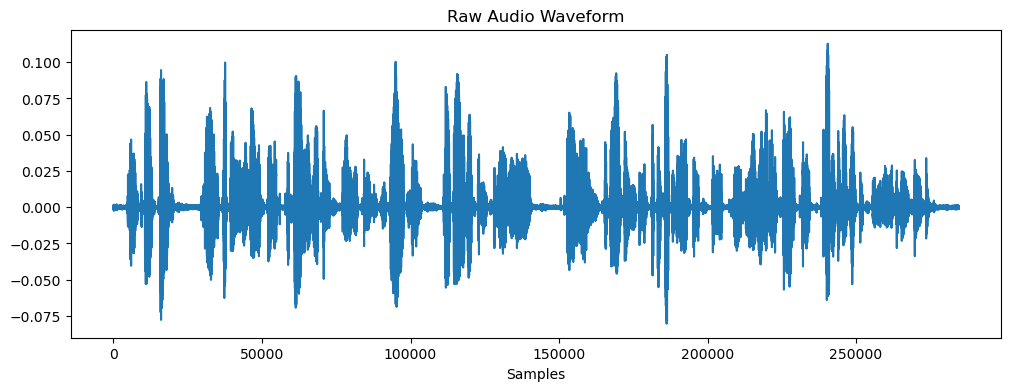

In [98]:
sample_path1 = "C:/Users/angel/git/mml_project/audio_analysis/data/CMU-MOSEI-CHUNKED/Audio/_2u0MkRqpjA-40.988-56.745.wav"
sample_path = df.iloc[0]['path']
y_audio, sr = librosa.load(sample_path, sr=16000)

print(f"Sample rate: {sr}, Audio duration: {len(y_audio)/sr:.2f} sec")

plt.figure(figsize=(12, 4))
plt.plot(y_audio)
plt.title("Raw Audio Waveform")
plt.xlabel("Samples")

In [60]:
mfcc = librosa.feature.mfcc(y=y_audio, sr=sr, n_mfcc=13)
chroma = librosa.feature.chroma_stft(y=y_audio, sr=sr)
mel = librosa.feature.melspectrogram(y=y_audio, sr=sr)

print("MFCC shape:", mfcc.shape)
print("Chroma shape:", chroma.shape)
print("Mel shape:", mel.shape)


MFCC shape: (13, 493)
Chroma shape: (12, 493)
Mel shape: (128, 493)


Combined feature shape: (153, 493)


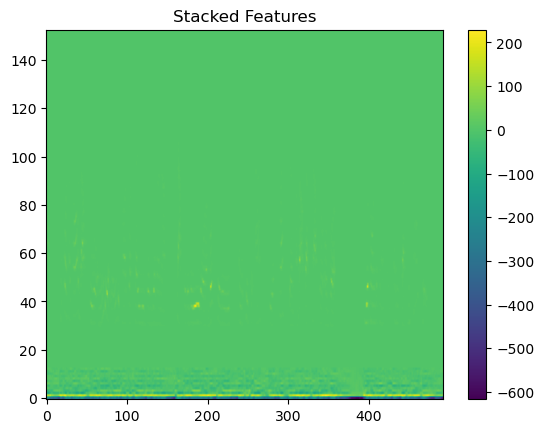

In [62]:
features = np.vstack([mfcc, chroma, mel])
print("Combined feature shape:", features.shape)

plt.imshow(features, aspect='auto', origin='lower')
plt.title("Stacked Features")
plt.colorbar()

In [64]:
max_len = 200

if features.shape[1] < max_len:
    pad_width = max_len - features.shape[1]
    features_padded = np.pad(features, ((0, 0), (0, pad_width)), mode='constant')
else:
    features_padded = features[:, :max_len]

print("Padded feature shape:", features_padded.shape)  # should be (num_features, 200)

Padded feature shape: (153, 200)


In [66]:
features_lstm = features_padded.T  # (200, num_features)
print("Final LSTM-ready shape:", features_lstm.shape)

Final LSTM-ready shape: (200, 153)


# After checking one file we will move on to all files

In [100]:
def extract_features(file_path, max_len=200):
    try:
        y, sr = librosa.load(file_path, sr=16000)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        
        features = np.vstack([mfcc, chroma, mel])  # (n_features, time_steps)
        
        # Pad or truncate to fixed length
        if features.shape[1] < max_len:
            pad_width = max_len - features.shape[1]
            features = np.pad(features, ((0, 0), (0, pad_width)), mode='constant')
        else:
            features = features[:, :max_len]

        return features.T  # shape: (time_steps, n_features)

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

In [104]:
from tqdm import tqdm

X = []
valid_labels = []

for i, row in tqdm(df.iterrows(), total=len(df)):
    features = extract_features(row['path'])
    if features is not None:
        X.append(features)
        valid_labels.append(row[emotion_columns].values)

X = np.array(X)  # shape: (num_samples, time_steps, n_features)
y = np.array(valid_labels)  # shape: (num_samples, 7)

  1%|          | 76/14681 [00:06<18:48, 12.95it/s]C:\Users\angel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\Users\angel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
 28%|██▊       | 4098/14681 [05:32<25:40,  6.87it/s]C:\Users\angel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
 37%|███▋      | 5375/14681 [07:34<17:51,  8.68it/s]C:\Users\angel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
 37%|███▋      | 5377/14681 [07:34<15:05, 10.27it/s]C:\Users\angel\anaconda3\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
C:\U

KeyboardInterrupt: 